In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df['target'] = iris.target

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df[df.target==0].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
df.shape

(150, 5)

In [15]:
df['flower_names'] = df.target.apply(lambda  x:iris.target_names[x])

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

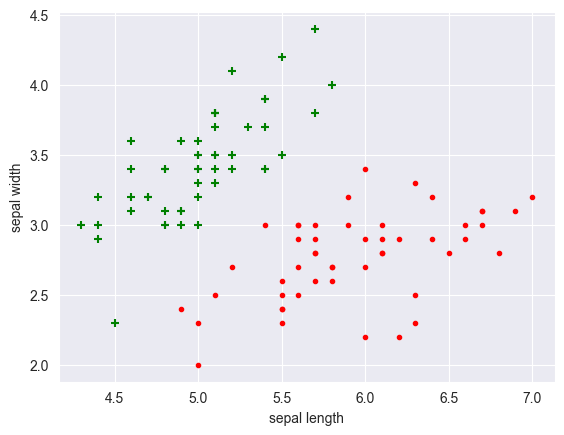

In [18]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

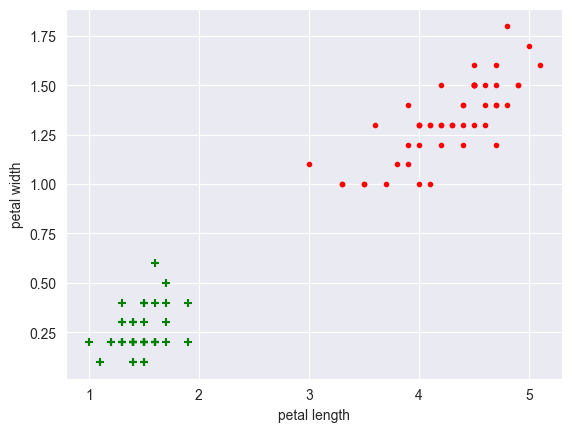

In [19]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [20]:
x = df.drop(['target','flower_names'],axis="columns")
y = df.target

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
len(x_train),len(x_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [24]:

from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors=9)

In [26]:
model.fit(x_train,y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
model.score(x_train,y_train)

0.9833333333333333

In [28]:
model.score(x_test,y_test)

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
ypred = model.predict(x_test)

In [31]:
ypred

array([1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 2, 2, 1])

In [32]:
cm = confusion_matrix(y_test,ypred)
cm

array([[ 7,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

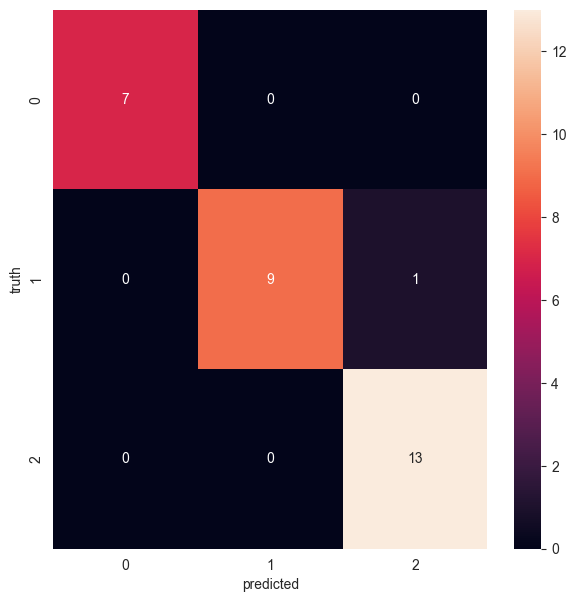

In [33]:
import seaborn as sns
plt.figure(figsize=[7,7])
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [36]:
import joblib

In [37]:
joblib.dump(model,"Knn_model.pkl")

['Knn_model.pkl']